In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import  SelectFromModel,variance_threshold
import numpy as np
from numpy import sort
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import roc_auc_score,f1_score ,accuracy_score
from sklearn.feature_selection import SelectFromModel
import category_encoders as ce

import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',50)

In [4]:
train = pd.read_csv("train_values.csv")
train_label = pd.read_csv("train_labels.csv")
test = pd.read_csv("test_values.csv")
sample_sub = pd.read_csv("submission_format.csv")

In [5]:
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  
0                         2642.0    4536         False  
1                         2108.0    2458         False  
2                         1048.0    5710         False  
3                         2299.0    5888          True  
4                         1847.0     289         False

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

In [7]:
train.describe()

row_id      loan_type  property_type   loan_purpose  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean   249999.500000       1.366276       1.047650       2.066810   
std    144337.711634       0.690555       0.231404       0.948371   
min         0.000000       1.000000       1.000000       1.000000   
25%    124999.750000       1.000000       1.000000       1.000000   
50%    249999.500000       1.000000       1.000000       2.000000   
75%    374999.250000       2.000000       1.000000       3.000000   
max    499999.000000       4.000000       3.000000       3.000000   

           occupancy    loan_amount    preapproval         msa_md  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        1.109590     221.753158       2.764722     181.606972   
std         0.326092     590.641648       0.543061     138.464169   
min         1.000000       1.000000       1.000000      -1.000000   
25%         1.000000      93.000000       3.000000      25.000000   
50%         1.000000     162.000000       3.000000     192.000000   
75%         1.000000     266.000000       3.000000     314.000000   
max         3.000000  100878.000000       3.000000     408.000000   

          state_code    county_code  applicant_ethnicity  applicant_race  \
count  500000.000000  500000.000000        500000.000000   500000.000000   
mean       23.726924     144.542062             2.036228        4.786586   
std        15.982768     100.243612             0.511351        1.024927   
min        -1.000000      -1.000000             1.000000        1.000000   
25%         6.000000      57.000000             2.000000        5.000000   
50%        26.000000     131.000000             2.000000        5.000000   
75%        37.000000     246.000000             2.000000        5.000000   
max        52.000000     324.000000             4.000000        7.000000   

       applicant_sex  applicant_income     population  \
count  500000.000000     460052.000000  477535.000000   
mean        1.462374        102.389521    5416.833956   
std         0.677685        153.534496    2728.144999   
min         1.000000          1.000000      14.000000   
25%         1.000000         47.000000    3744.000000   
50%         1.000000         74.000000    4975.000000   
75%         2.000000        117.000000    6467.000000   
max         4.000000      10139.000000   37097.000000   

       minority_population_pct  ffiecmedian_family_income  \
count            477534.000000              477560.000000   
mean                 31.617310               69235.603298   
std                  26.333938               14810.058791   
min                   0.534000               17858.000000   
25%                  10.700000               59731.000000   
50%                  22.901000               67526.000000   
75%                  46.020000               75351.000000   
max                 100.000000              125248.000000   

       tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
count               477486.000000                   477435.000000   
mean                    91.832624                     1427.718282   
std                     14.210924                      737.559511   
min                      3.981000                        4.000000   
25%                     88.067250                      944.000000   
50%                    100.000000                     1327.000000   
75%                    100.000000                     1780.000000   
max                    100.000000                     8771.000000   

       number_of_1_to_4_family_units         lender  
count                  477470.000000  500000.000000  
mean                     1886.147065    3720.121344  
std                       914.123744    1838.313175  
min                         1.000000       0.000000  
25%                      1301.000000    2442.000000  
50%                      1753.000000    3731.000000  
75%                  

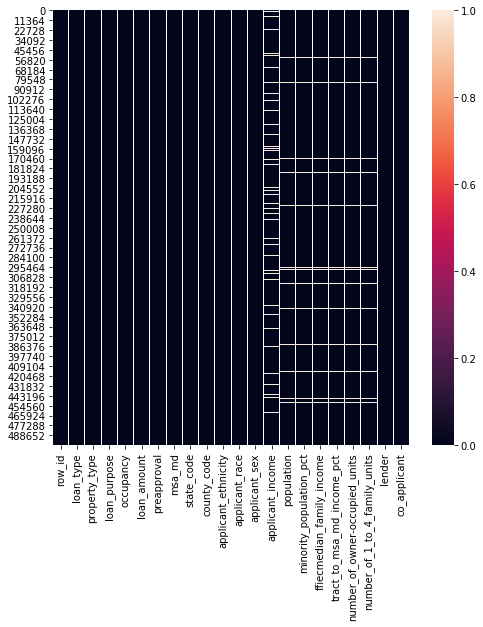

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

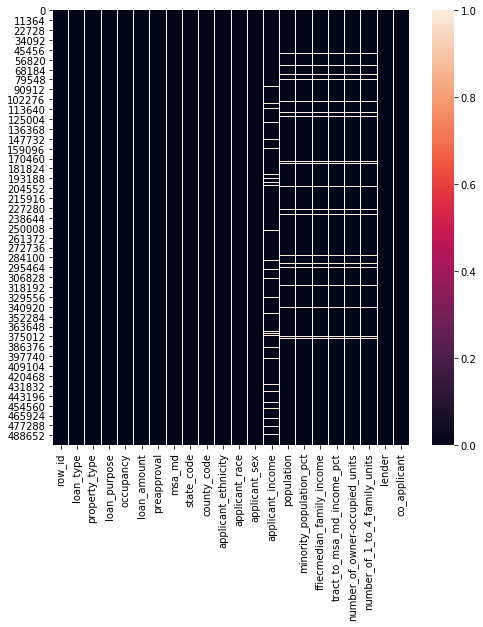

In [13]:
plt.figure(figsize=(8, 8))
sns.heatmap(test.isnull())

## taking care of missing values in 
['applicant_income', 'population', 'minority_population_pct',
'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

In [14]:
train= pd.concat([train,train_label.accepted],axis=1)

In [15]:
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  
0                         2642.0    4536         False         1  
1                         2108.0    2458         False         0  
2                         1048.0    5710         False         1  
3                         2299.0    5888          True         1  
4                         1847.0     289         False         1

In [16]:
train.isnull().mean()

row_id                            0.000000
loan_type                         0.000000
property_type                     0.000000
loan_purpose                      0.000000
occupancy                         0.000000
loan_amount                       0.000000
preapproval                       0.000000
msa_md                            0.000000
state_code                        0.000000
county_code                       0.000000
applicant_ethnicity               0.000000
applicant_race                    0.000000
applicant_sex                     0.000000
applicant_income                  0.079896
population                        0.044930
minority_population_pct           0.044932
ffiecmedian_family_income         0.044880
tract_to_msa_md_income_pct        0.045028
number_of_owner-occupied_units    0.045130
number_of_1_to_4_family_units     0.045060
lender                            0.000000
co_applicant                      0.000000
accepted                          0.000000
dtype: floa

## 1.0 dealing with the missing data in applicant_income

In [17]:
train.applicant_income.isnull().sum()

39948

In [18]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [19]:
train_applicant_income = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income']]
train_applicant_income.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0          3              1             1          1         70.0   
1          1              1             3          1        178.0   
2          2              1             3          1        163.0   
3          1              1             1          1        155.0   
4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  
0               5              1              24.0  
1               5              1              57.0  
2               5              1              67.0  
3               5              1             105.0  
4               3              2              71.0

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_applicant_income, train.accepted, test_size=0.33, random_state=42)

In [21]:
def impute_na(df,variable,mean,median): 
    df[variable+'_mean'] = df[variable].fillna(mean)
    df[variable+'_median'] = df[variable].fillna(median)

In [22]:
mean = X_train.applicant_income.mean()
median = X_train.applicant_income.median()
mean,median

(102.38897689426155, 74.0)

In [23]:
impute_na(X_train,'applicant_income',mean,median)

In [24]:
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income  \
423599               5              2              95.0   
213903               5              1              51.0   
310642               6              1             756.0   
309308               5              2             156.0   
69094                5              1              43.0   

        applicant_income_mean  applicant_income_median  
423599                   95.0                     95.0  
213903                   51.0                     51.0  
310642                  756.0                    756.0  
309308                  156.0                    156.0  
69094                    43.0                     43.0

In [25]:
impute_na(X_test,'applicant_income',mean,median)

In [26]:
#addition missingness features

# create variable indicating missingness in applicant_income
X_train['applicant_income_NA'] = np.where(X_train.applicant_income.isnull(),1,0)
X_test['applicant_income_NA'] = np.where(X_test.applicant_income.isnull(),1,0)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income  \
423599               5              2              95.0   
213903               5              1              51.0   
310642               6              1             756.0   
309308               5              2             156.0   
69094                5              1              43.0   

        applicant_income_mean  applicant_income_median  applicant_income_NA  
423599                   95.0                     95.0                    0  
213903                   51.0                     51.0                    0  
310642                  756.0                    756.0                    0  
309308                  156.0                    156.0                    0  
69094                    43.0                     43.0                    0

In [27]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols


## logistic reg 1.0

In [28]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['applicant_income','applicant_income_median','applicant_income_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_median','applicant_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_median','applicant_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['applicant_income','applicant_income_mean','applicant_income_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_mean','applicant_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_mean','applicant_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['applicant_income','applicant_income_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['applicant_income','applicant_income_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6558838493888023
Test set mean imputation
Logistic Reg roc_auc: 0.6558853965781354

Train set median imputation
Logistic Reg roc-auc: 0.6552850004442998
Test set median imputation
Logistic Reg roc_auc: 0.6552850752893493

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6581682256888779
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6578678190862997

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6581681095648247
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6578677259351216



## concluding on applicant_income missing values
the missing data in the applicant_income has predictive powers to the target variable 

best approach to treat applicant_income missing values = mean imputation and missingness

In [29]:
# inplementation based on the conclussion above in applicant_income
train['applicant_income_NA'] = np.where(train.applicant_income.isnull(),1,0)
test['applicant_income_NA'] = np.where(test.applicant_income.isnull(),1,0)
train.applicant_income.fillna(train.applicant_income.mean(),inplace=True)
test.applicant_income.fillna(train.applicant_income.mean(),inplace=True)
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

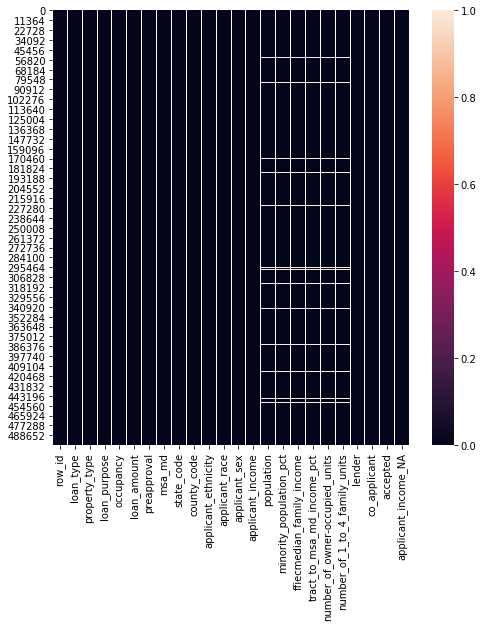

In [30]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.1 taking care of missing values in population

In [31]:
train.population.isnull().mean()

0.04493

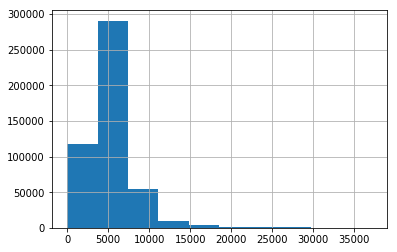

In [32]:
train.population.hist()

In [33]:
train.population.mean(),train.population.median()

(5416.833955626289, 4975.0)

In [34]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA'],
      dtype='object')

In [35]:
train_population = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income','applicant_income_NA', 'population']]
train_population.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0          3              1             1          1         70.0   
1          1              1             3          1        178.0   
2          2              1             3          1        163.0   
3          1              1             1          1        155.0   
4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  applicant_income_NA  \
0               5              1              24.0                    0   
1               5              1              57.0                    0   
2               5              1              67.0                    0   
3               5              1             105.0                    0   
4               3              2              71.0                    0   

   population  
0      6203.0  
1      5774.0  
2      6094.0  
3      6667.0  
4      6732.0

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train_population, train.accepted, test_size=0.33, random_state=42)

In [37]:
mean = X_train.population.mean()
median = X_train.population.median()
mean,median

(5420.958475940425, 4975.0)

In [38]:
impute_na(X_train,'population',mean,median)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income  applicant_income_NA  \
423599               5              2              95.0                    0   
213903               5              1              51.0                    0   
310642               6              1             756.0                    0   
309308               5              2             156.0                    0   
69094                5              1              43.0                    0   

        population  population_mean  population_median  
423599      3022.0      3022.000000             3022.0  
213903      2735.0      2735.000000             2735.0  
310642      6133.0      6133.000000             6133.0  
309308         NaN      5420.958476             4975.0  
69094      13630.0     13630.000000            13630.0

In [39]:
impute_na(X_test,'population',mean,median)

In [40]:
#addition missingness features

# create variable indicating missingness in population
X_train['population_NA'] = np.where(X_train.population.isnull(),1,0)
X_test['population_NA'] = np.where(X_test.population.isnull(),1,0)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income  applicant_income_NA  \
423599               5              2              95.0                    0   
213903               5              1              51.0                    0   
310642               6              1             756.0                    0   
309308               5              2             156.0                    0   
69094                5              1              43.0                    0   

        population  population_mean  population_median  population_NA  
423599      3022.0      3022.000000             3022.0              0  
213903      2735.0      2735.000000             2735.0              0  
310642      6133.0      6133.000000             6133.0              0  
309308         NaN      5420.958476             4975.0              1  
69094      13630.0     13630.000000            13630.0              0

In [41]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## logistic reg 1.1

In [42]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['population','population_median','population_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['population','population_median','population_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['population','population_median','population_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['population','population_mean','population_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['population','population_mean','population_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['population','population_mean','population_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['population','population_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['population','population_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['population','population_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['population','population_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['population','population_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['population','population_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6584834173428608
Test set mean imputation
Logistic Reg roc_auc: 0.658098282226762

Train set median imputation
Logistic Reg roc-auc: 0.6586490701938451
Test set median imputation
Logistic Reg roc_auc: 0.6582453641168541

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.679887172794193
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6795690666323614

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6798871655943592
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6795690641346168



## concluding on population missing values
the missing data in the population has predictive powers to the target variable 

best approach to treat population missing values = mean imputation and missingness

In [43]:
# inplementation based on the conclussion above in applicant_income
train['population_NA'] = np.where(train.population.isnull(),1,0)
test['population_NA'] = np.where(test.population.isnull(),1,0)
train.population.fillna(train.population.mean(),inplace=True)
test.population.fillna(train.population.mean(),inplace=True)
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  
0                    0              0  
1                    0              0  
2                    0              0  
3                    0              0  
4                    0              0

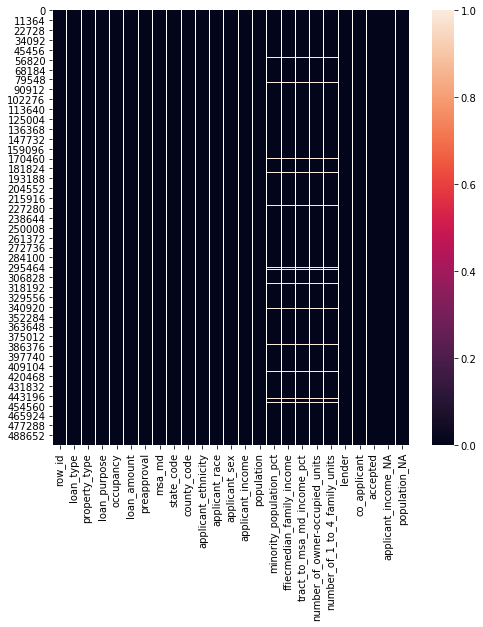

In [44]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.2 taking care of missing values in minority_population_pct

In [45]:
train.minority_population_pct.isnull().mean()

0.044932

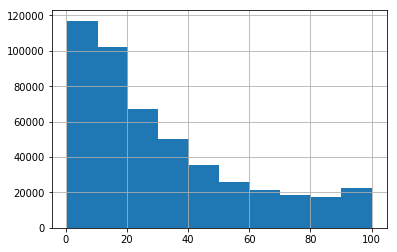

In [46]:
train.minority_population_pct.hist()

In [47]:
train.minority_population_pct.mean(),train.minority_population_pct.median()

(31.617310254347984, 22.901)

In [48]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA'],
      dtype='object')

In [49]:
train_minority_population_pct = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income','applicant_income_NA', 'population','population_NA','minority_population_pct']]
train_minority_population_pct.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0          3              1             1          1         70.0   
1          1              1             3          1        178.0   
2          2              1             3          1        163.0   
3          1              1             1          1        155.0   
4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  applicant_income_NA  \
0               5              1              24.0                    0   
1               5              1              57.0                    0   
2               5              1              67.0                    0   
3               5              1             105.0                    0   
4               3              2              71.0                    0   

   population  population_NA  minority_population_pct  
0      6203.0              0                   44.230  
1      5774.0              0                   15.905  
2      6094.0              0                   61.270  
3      6667.0              0                    6.246  
4      6732.0              0                  100.000

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train_minority_population_pct, train.accepted, test_size=0.33, random_state=42)

In [51]:
mean = X_train.minority_population_pct.mean()
median = X_train.minority_population_pct.median()
mean,median

(31.664889411566936, 22.945999999999998)

In [52]:
impute_na(X_train,'minority_population_pct',mean,median)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income  applicant_income_NA  \
423599               5              2              95.0                    0   
213903               5              1              51.0                    0   
310642               6              1             756.0                    0   
309308               5              2             156.0                    0   
69094                5              1              43.0                    0   

          population  population_NA  minority_population_pct  \
423599   3022.000000              0                   20.752   
213903   2735.000000              0                   34.215   
310642   6133.000000              0                   14.266   
309308   5416.833956              1                      NaN   
69094   13630.000000              0                    7.346   

        minority_population_pct_mean  minority_population_pct_median  
423599                     20.752000                          20.752  
213903                     34.215000                          34.215  
310642                     14.266000                          14.266  
309308                     31.664889                          22.946  
69094                       7.346000                           7.346

In [53]:
impute_na(X_test,'minority_population_pct',mean,median)

In [54]:
#addition missingness features

# create variable indicating missingness in population
X_train['minority_population_pct_NA'] = np.where(X_train.minority_population_pct.isnull(),1,0)
X_test['minority_population_pct_NA'] = np.where(X_test.minority_population_pct.isnull(),1,0)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income  applicant_income_NA  \
423599               5              2              95.0                    0   
213903               5              1              51.0                    0   
310642               6              1             756.0                    0   
309308               5              2             156.0                    0   
69094                5              1              43.0                    0   

          population  population_NA  minority_population_pct  \
423599   3022.000000              0                   20.752   
213903   2735.000000              0                   34.215   
310642   6133.000000              0                   14.266   
309308   5416.833956              1                      NaN   
69094   13630.000000              0                    7.346   

        minority_population_pct_mean  minority_population_pct_median  \
423599                     20.752000                          20.752   
213903                     34.215000                          34.215   
310642                     14.266000                          14.266   
309308                     31.664889                          22.946   
69094                       7.346000                           7.346   

        minority_population_pct_NA  
423599                           0  
213903                           0  
310642                           0  
309308                           1  
69094                            0

In [55]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.2 logistic reg

In [56]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6854141537078935
Logistic Reg accuracy: 0.6322298507462687
Test set mean imputation
Logistic Reg roc_auc: 0.6842187372178613
Logistic Reg accuracy: 0.6301878787878787

Train set median imputation
Logistic Reg roc-auc: 0.6854143788274515
Logistic Reg accuracy: 0.6322268656716418
Test set median imputation
Logistic Reg roc_auc: 0.6842186926992383
Logistic Reg accuracy: 0.6302

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6854187275627521
Logistic Reg accuracy: 0.6322149253731343
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.684219263654251
Logistic Reg accuracy: 0.6301757575757576

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6854185526994601
Logistic Reg accuracy: 0.632220895522388
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6842191339184619
Logistic Reg accuracy: 0.6301818181818182



## concluding on minority_population_pct missing values
the missing data in the minority_population_pct has predictive powers to the target variable 

best approach to treat minority_population_pct missing values = median imputation

In [57]:
# inplementation based on the conclussion above in minority_population_pct
train.minority_population_pct.fillna(train.minority_population_pct.median(),inplace=True)
test.minority_population_pct.fillna(train.minority_population_pct.median(),inplace=True)
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  
0                    0              0  
1                    0              0  
2                    0              0  
3                    0              0  
4                    0              0

## note that addition pf missingness for minority_population_pct reduces the accuracy 
## because the missingness has been captured by the previous case 
## since missingness is across same rows 


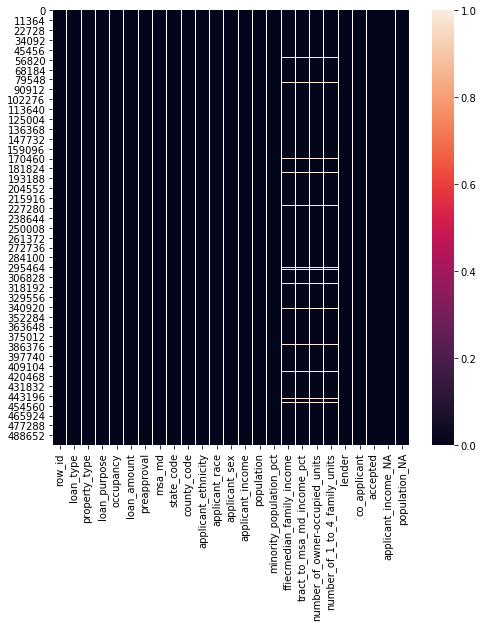

In [58]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.3 taking care of missing values in ffiecmedian_family_income

In [59]:
train.ffiecmedian_family_income.isnull().mean()

0.04488

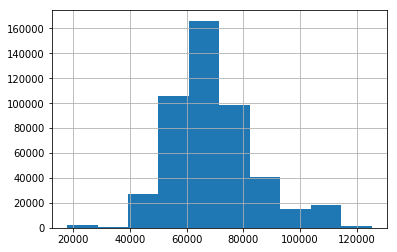

In [60]:
train.ffiecmedian_family_income.hist()

In [61]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA'],
      dtype='object')

In [62]:
train_ffiecmedian_family_income = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income','applicant_income_NA', 'population','population_NA','minority_population_pct','ffiecmedian_family_income']]
train_ffiecmedian_family_income.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0          3              1             1          1         70.0   
1          1              1             3          1        178.0   
2          2              1             3          1        163.0   
3          1              1             1          1        155.0   
4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  applicant_income_NA  \
0               5              1              24.0                    0   
1               5              1              57.0                    0   
2               5              1              67.0                    0   
3               5              1             105.0                    0   
4               3              2              71.0                    0   

   population  population_NA  minority_population_pct  \
0      6203.0              0                   44.230   
1      5774.0              0                   15.905   
2      6094.0              0                   61.270   
3      6667.0              0                    6.246   
4      6732.0              0                  100.000   

   ffiecmedian_family_income  
0                    60588.0  
1                    54821.0  
2                    67719.0  
3                    78439.0  
4                    63075.0

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train_ffiecmedian_family_income, train.accepted, test_size=0.33, random_state=42)

In [64]:
mean = X_train.ffiecmedian_family_income.mean()
median = X_train.ffiecmedian_family_income.median()
mean,median

(69219.91141796269, 67504.0)

In [65]:
impute_na(X_train,'ffiecmedian_family_income',mean,median)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income  applicant_income_NA  \
423599               5              2              95.0                    0   
213903               5              1              51.0                    0   
310642               6              1             756.0                    0   
309308               5              2             156.0                    0   
69094                5              1              43.0                    0   

          population  population_NA  minority_population_pct  \
423599   3022.000000              0                   20.752   
213903   2735.000000              0                   34.215   
310642   6133.000000              0                   14.266   
309308   5416.833956              1                   22.901   
69094   13630.000000              0                    7.346   

        ffiecmedian_family_income  ffiecmedian_family_income_mean  \
423599                    78776.0                    78776.000000   
213903                    55879.0                    55879.000000   
310642                    69780.0                    69780.000000   
309308                        NaN                    69219.911418   
69094                     69907.0                    69907.000000   

        ffiecmedian_family_income_median  
423599                           78776.0  
213903                           55879.0  
310642                           69780.0  
309308                           67504.0  
69094                            69907.0

In [66]:
impute_na(X_test,'ffiecmedian_family_income',mean,median)

In [67]:
#addition missingness features

# create variable indicating missingness in population
X_train['ffiecmedian_family_income_NA'] = np.where(X_train.ffiecmedian_family_income.isnull(),1,0)
X_test['ffiecmedian_family_income_NA'] = np.where(X_test.ffiecmedian_family_income.isnull(),1,0)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income  applicant_income_NA  \
423599               5              2              95.0                    0   
213903               5              1              51.0                    0   
310642               6              1             756.0                    0   
309308               5              2             156.0                    0   
69094                5              1              43.0                    0   

          population  population_NA  minority_population_pct  \
423599   3022.000000              0                   20.752   
213903   2735.000000              0                   34.215   
310642   6133.000000              0                   14.266   
309308   5416.833956              1                   22.901   
69094   13630.000000              0                    7.346   

        ffiecmedian_family_income  ffiecmedian_family_income_mean  \
423599                    78776.0                    78776.000000   
213903                    55879.0                    55879.000000   
310642                    69780.0                    69780.000000   
309308                        NaN                    69219.911418   
69094                     69907.0                    69907.000000   

        ffiecmedian_family_income_median  ffiecmedian_family_income_NA  
423599                           78776.0                             0  
213903                           55879.0                             0  
310642                           69780.0                             0  
309308                           67504.0                             1  
69094                            69907.0                             0

In [68]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.3 logistic reg

In [69]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6866887593312359
Logistic Reg accuracy: 0.633020895522388
Test set mean imputation
Logistic Reg roc_auc: 0.6851716028041837
Logistic Reg accuracy: 0.6309575757575757

Train set median imputation
Logistic Reg roc-auc: 0.6866895835696432
Logistic Reg accuracy: 0.6330149253731343
Test set median imputation
Logistic Reg roc_auc: 0.6851724505680598
Logistic Reg accuracy: 0.6309636363636364

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6867239061757012
Logistic Reg accuracy: 0.6330537313432836
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.685176072150691
Logistic Reg accuracy: 0.6310060606060606

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6867243087604714
Logistic Reg accuracy: 0.6330567164179104
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6851764122847245
Logistic Reg accuracy: 0.6310121212121212



## concluding on ffiecmedian_family_income missing values
the missing data in the ffiecmedian_family_income has predictive powers to the target variable 

best approach to treat ffiecmedian_family_income missing values = median imputation and missingness

In [70]:
# inplementation based on the conclussion above in applicant_income
train['ffiecmedian_family_income_NA'] = np.where(train.ffiecmedian_family_income.isnull(),1,0)
test['ffiecmedian_family_income_NA'] = np.where(test.ffiecmedian_family_income.isnull(),1,0)
train.ffiecmedian_family_income.fillna(train.ffiecmedian_family_income.mean(),inplace=True)
test.ffiecmedian_family_income.fillna(train.ffiecmedian_family_income.mean(),inplace=True)
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  
0                    0              0                             0  
1                    0              0                             0  
2                    0              0                             0  
3                    0              0                             0  
4                    0              0                             0

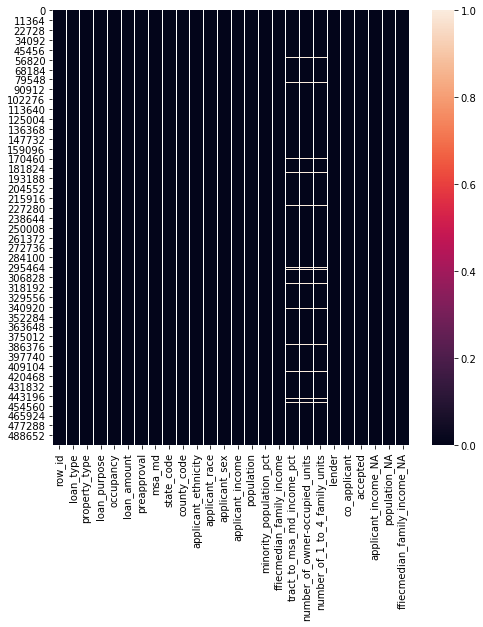

In [71]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.4 taking care of missing values in tract_to_msa_md_income_pct

In [72]:
train.tract_to_msa_md_income_pct.isnull().mean()

0.045028

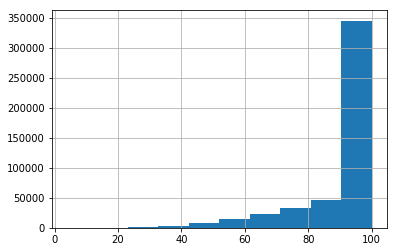

In [73]:
train.tract_to_msa_md_income_pct.hist()

In [74]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA'],
      dtype='object')

In [75]:
train_tract_to_msa_md_income_pct = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income','applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA','tract_to_msa_md_income_pct']]
train_tract_to_msa_md_income_pct.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0          3              1             1          1         70.0   
1          1              1             3          1        178.0   
2          2              1             3          1        163.0   
3          1              1             1          1        155.0   
4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  applicant_income_NA  \
0                   44.230                    60588.0                    0   
1                   15.905                    54821.0                    0   
2                   61.270                    67719.0                    0   
3                    6.246                    78439.0                    0   
4                  100.000                    63075.0                    0   

   population_NA  ffiecmedian_family_income_NA  tract_to_msa_md_income_pct  
0              0                             0                      50.933  
1              0                             0                     100.000  
2              0                             0                     100.000  
3              0                             0                     100.000  
4              0                             0                      82.200

In [76]:
X_train, X_test, y_train, y_test = train_test_split(train_tract_to_msa_md_income_pct, train.accepted, test_size=0.33, random_state=42)

In [77]:
mean = X_train.tract_to_msa_md_income_pct.mean()
median = X_train.tract_to_msa_md_income_pct.median()
mean,median

(91.82864237015202, 100.0)

In [78]:
impute_na(X_train,'tract_to_msa_md_income_pct',mean,median)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income    population  \
423599               5              2              95.0   3022.000000   
213903               5              1              51.0   2735.000000   
310642               6              1             756.0   6133.000000   
309308               5              2             156.0   5416.833956   
69094                5              1              43.0  13630.000000   

        minority_population_pct  ffiecmedian_family_income  \
423599                   20.752               78776.000000   
213903                   34.215               55879.000000   
310642                   14.266               69780.000000   
309308                   22.901               69235.603298   
69094                     7.346               69907.000000   

        applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
423599                    0              0                             0   
213903                    0              0                             0   
310642                    0              0                             0   
309308                    0              1                             1   
69094                     0              0                             0   

        tract_to_msa_md_income_pct  tract_to_msa_md_income_pct_mean  \
423599                      84.373                        84.373000   
213903                      95.031                        95.031000   
310642                     100.000                       100.000000   
309308                         NaN                        91.828642   
69094                      100.000                       100.000000   

        tract_to_msa_md_income_pct_median  
423599                             84.373  
213903                             95.031  
310642                            100.000  
309308                            100.000  
69094                             100.000

In [79]:
impute_na(X_test,'tract_to_msa_md_income_pct',mean,median)

In [80]:
#addition missingness features

# create variable indicating missingness in population
X_train['tract_to_msa_md_income_pct_NA'] = np.where(X_train.tract_to_msa_md_income_pct.isnull(),1,0)
X_test['tract_to_msa_md_income_pct_NA'] = np.where(X_test.tract_to_msa_md_income_pct.isnull(),1,0)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income    population  \
423599               5              2              95.0   3022.000000   
213903               5              1              51.0   2735.000000   
310642               6              1             756.0   6133.000000   
309308               5              2             156.0   5416.833956   
69094                5              1              43.0  13630.000000   

        minority_population_pct  ffiecmedian_family_income  \
423599                   20.752               78776.000000   
213903                   34.215               55879.000000   
310642                   14.266               69780.000000   
309308                   22.901               69235.603298   
69094                     7.346               69907.000000   

        applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
423599                    0              0                             0   
213903                    0              0                             0   
310642                    0              0                             0   
309308                    0              1                             1   
69094                     0              0                             0   

        tract_to_msa_md_income_pct  tract_to_msa_md_income_pct_mean  \
423599                      84.373                        84.373000   
213903                      95.031                        95.031000   
310642                     100.000                       100.000000   
309308                         NaN                        91.828642   
69094                      100.000                       100.000000   

        tract_to_msa_md_income_pct_median  tract_to_msa_md_income_pct_NA  
423599                             84.373                              0  
213903                             95.031                              0  
310642                            100.000                              0  
309308                            100.000                              1  
69094                             100.000                              0

In [81]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.4 logistic reg

In [82]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6880718011535056
Logistic Reg accuracy: 0.6341223880597014
Test set mean imputation
Logistic Reg roc_auc: 0.6865322927698112
Logistic Reg accuracy: 0.6309575757575757

Train set median imputation
Logistic Reg roc-auc: 0.688070782911654
Logistic Reg accuracy: 0.6341313432835821
Test set median imputation
Logistic Reg roc_auc: 0.6865316799408464
Logistic Reg accuracy: 0.6309575757575757

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6880825459075609
Logistic Reg accuracy: 0.6341044776119403
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6865371920222288
Logistic Reg accuracy: 0.6309818181818182

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6880825836175818
Logistic Reg accuracy: 0.6341044776119403
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6865372246398338
Logistic Reg accuracy: 0.6309818181818182



## concluding on tract_to_msa_md_income_pct missing values
the missing data in the tract_to_msa_md_income_pct has predictive powers to the target variable 

best approach to treat tract_to_msa_md_income_pct missing values = median imputation and missingness

In [83]:
# inplementation based on the conclussion above in applicant_income
train['tract_to_msa_md_income_pct_NA'] = np.where(train.tract_to_msa_md_income_pct.isnull(),1,0)
test['tract_to_msa_md_income_pct_NA'] = np.where(test.tract_to_msa_md_income_pct.isnull(),1,0)
train.tract_to_msa_md_income_pct.fillna(train.tract_to_msa_md_income_pct.median(),inplace=True)
test.tract_to_msa_md_income_pct.fillna(train.tract_to_msa_md_income_pct.median(),inplace=True)
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

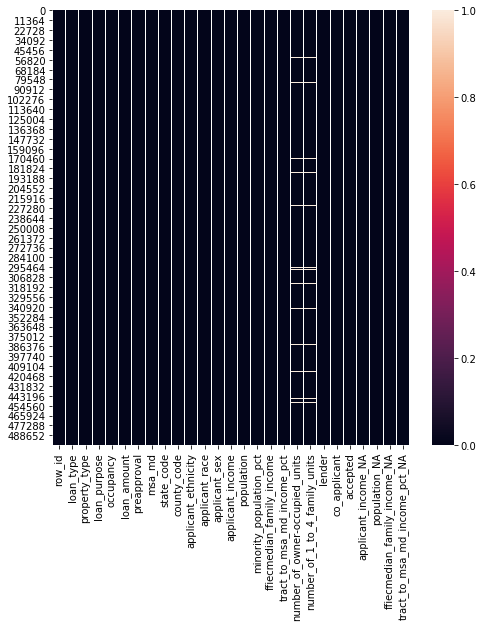

In [84]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.5 taking care of missing values in number_of_owner-occupied_units

In [85]:
train['number_of_owner-occupied_units'].isnull().mean()

0.04513

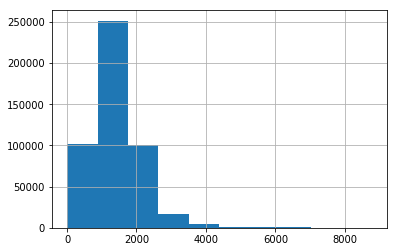

In [86]:
train['number_of_owner-occupied_units'].hist()

In [87]:
list(train.columns)

['row_id',
 'loan_type',
 'property_type',
 'loan_purpose',
 'occupancy',
 'loan_amount',
 'preapproval',
 'msa_md',
 'state_code',
 'county_code',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'applicant_income',
 'population',
 'minority_population_pct',
 'ffiecmedian_family_income',
 'tract_to_msa_md_income_pct',
 'number_of_owner-occupied_units',
 'number_of_1_to_4_family_units',
 'lender',
 'co_applicant',
 'accepted',
 'applicant_income_NA',
 'population_NA',
 'ffiecmedian_family_income_NA',
 'tract_to_msa_md_income_pct_NA']

In [88]:
train.columns=['row_id','loan_type','property_type','loan_purpose','occupancy','loan_amount','preapproval','msa_md','state_code','county_code','applicant_ethnicity','applicant_race',
 'applicant_sex','applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner_occupied_units','number_of_1_to_4_family_units',
 'lender','co_applicant','accepted','applicant_income_NA','population_NA','ffiecmedian_family_income_NA','tract_to_msa_md_income_pct_NA']

In [89]:
test.columns=['row_id','loan_type',
 'property_type','loan_purpose',
 'occupancy','loan_amount','preapproval','msa_md','state_code','county_code','applicant_ethnicity','applicant_race','applicant_sex','applicant_income','population','minority_population_pct',
 'ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner_occupied_units','number_of_1_to_4_family_units','lender','co_applicant','applicant_income_NA',
 'population_NA','ffiecmedian_family_income_NA','tract_to_msa_md_income_pct_NA']

In [90]:
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [91]:
train_number_of_owner_occupied_units = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner_occupied_units','applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA',
       'tract_to_msa_md_income_pct_NA']]
train_number_of_owner_occupied_units.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0          3              1             1          1         70.0   
1          1              1             3          1        178.0   
2          2              1             3          1        163.0   
3          1              1             1          1        155.0   
4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [92]:
X_train, X_test, y_train, y_test = train_test_split(train_number_of_owner_occupied_units, train.accepted, test_size=0.33, random_state=42)

In [93]:
mean = X_train.number_of_owner_occupied_units.mean()
median = X_train.number_of_owner_occupied_units.median()
mean,median

(1428.4156868139598, 1327.0)

In [94]:
impute_na(X_train,'number_of_owner_occupied_units',mean,median)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income    population  \
423599               5              2              95.0   3022.000000   
213903               5              1              51.0   2735.000000   
310642               6              1             756.0   6133.000000   
309308               5              2             156.0   5416.833956   
69094                5              1              43.0  13630.000000   

        minority_population_pct  ffiecmedian_family_income  \
423599                   20.752               78776.000000   
213903                   34.215               55879.000000   
310642                   14.266               69780.000000   
309308                   22.901               69235.603298   
69094                     7.346               69907.000000   

        tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
423599                      84.373                          1155.0   
213903                      95.031                           790.0   
310642                     100.000                          1670.0   
309308                     100.000                             NaN   
69094                      100.000                          4104.0   

        applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
423599                    0              0                             0   
213903                    0              0                             0   
310642                    0              0                             0   
309308                    0              1                             1   
69094                     0              0                             0   

        tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_mean  \
423599                              0                          1155.000000   
213903                              0                           790.000000   
310642                              0                          1670.000000   
309308                              1                          1428.415687   
69094                               0                          4104.000000   

        number_of_owner_occupied_units_median  
423599                                 1155.0  
213903                                  790.0  
310642                                 1670.0  
309308                                 1327.0  
69094                                  4104.0

In [95]:
impute_na(X_test,'number_of_owner_occupied_units',mean,median)

In [96]:
#addition missingness features

# create variable indicating missingness in population
X_train['number_of_owner_occupied_units_NA'] = np.where(X_train.number_of_owner_occupied_units.isnull(),1,0)
X_test['number_of_owner_occupied_units_NA'] = np.where(X_test.number_of_owner_occupied_units.isnull(),1,0)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income    population  \
423599               5              2              95.0   3022.000000   
213903               5              1              51.0   2735.000000   
310642               6              1             756.0   6133.000000   
309308               5              2             156.0   5416.833956   
69094                5              1              43.0  13630.000000   

        minority_population_pct  ffiecmedian_family_income  \
423599                   20.752               78776.000000   
213903                   34.215               55879.000000   
310642                   14.266               69780.000000   
309308                   22.901               69235.603298   
69094                     7.346               69907.000000   

        tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
423599                      84.373                          1155.0   
213903                      95.031                           790.0   
310642                     100.000                          1670.0   
309308                     100.000                             NaN   
69094                      100.000                          4104.0   

        applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
423599                    0              0                             0   
213903                    0              0                             0   
310642                    0              0                             0   
309308                    0              1                             1   
69094                     0              0                             0   

        tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_mean  \
423599                              0                          1155.000000   
213903                              0                           790.000000   
310642                              0                          1670.000000   
309308                              1                          1428.415687   
69094                               0                          4104.000000   

        number_of_owner_occupied_units_median  \
423599                                 1155.0   
213903                                  790.0   
310642                                 1670.0   
309308                                 1327.0   
69094                                  4104.0   

        number_of_owner_occupied_units_NA  
423599                                  0  
213903                                  0  
310642                                  0  
309308                                  1  
69094                                   0

In [97]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.5 logistic reg

In [98]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6884376629927774
Logistic Reg accuracy: 0.6339313432835821
Test set mean imputation
Logistic Reg roc_auc: 0.6866795207044948
Logistic Reg accuracy: 0.6315090909090909

Train set median imputation
Logistic Reg roc-auc: 0.6884371067877897
Logistic Reg accuracy: 0.633934328358209
Test set median imputation
Logistic Reg roc_auc: 0.6866795875558924
Logistic Reg accuracy: 0.6315151515151515

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6884412287996088
Logistic Reg accuracy: 0.6339432835820895
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6866795086565506
Logistic Reg accuracy: 0.6315333333333333

Train set median imputation and missingness
Logistic Reg roc-auc: 0.688440438493092
Logistic Reg accuracy: 0.6339283582089552
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6866787563946709
Logistic Reg accuracy: 0.6315151515151515



## concluding on number_of_owner_occupied_units missing values
the missing data in the number_of_owner_occupied_units has predictive powers to the target variable 

best approach to treat number_of_owner_occupied_units missing values = mean imputation and missingness

In [99]:
# inplementation based on the conclussion above in applicant_income
train['number_of_owner_occupied_units_NA'] = np.where(train.number_of_owner_occupied_units.isnull(),1,0)
test['number_of_owner_occupied_units_NA'] = np.where(test.number_of_owner_occupied_units.isnull(),1,0)
train.number_of_owner_occupied_units.fillna(train.number_of_owner_occupied_units.mean(),inplace=True)
test.number_of_owner_occupied_units.fillna(train.number_of_owner_occupied_units.mean(),inplace=True)
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  
0                              0                                  0  
1                              0                                  0  
2                              0                                  0  
3                              0                                  0  
4                              0                                  0

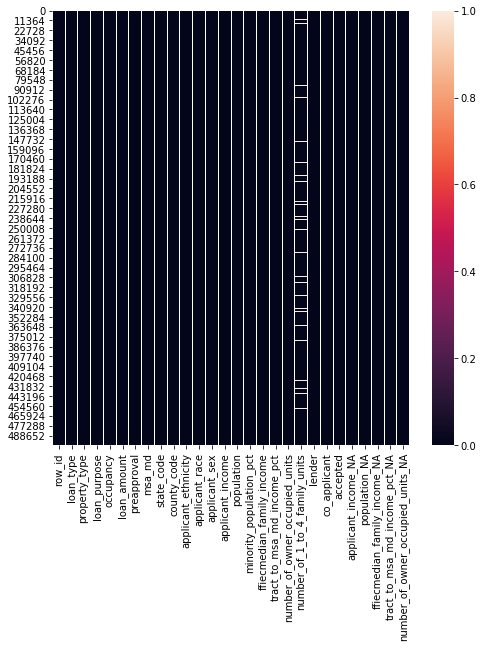

In [100]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.5 taking care of missing values in number_of_1_to_4_family_units

In [101]:
train.number_of_1_to_4_family_units.isnull().mean()

0.04506

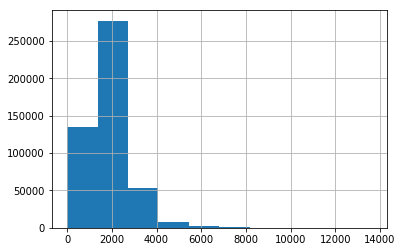

In [102]:
train.number_of_1_to_4_family_units.hist()

In [103]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA',
       'tract_to_msa_md_income_pct_NA', 'number_of_owner_occupied_units_NA'],
      dtype='object')

In [104]:
train_number_of_1_to_4_family_units = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA',
       'tract_to_msa_md_income_pct_NA', 'number_of_owner_occupied_units_NA']]
train_number_of_1_to_4_family_units.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0          3              1             1          1         70.0   
1          1              1             3          1        178.0   
2          2              1             3          1        163.0   
3          1              1             1          1        155.0   
4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  applicant_income_NA  population_NA  \
0                         2642.0                    0              0   
1                         2108.0                    0              0   
2                         1048.0                    0              0   
3                         2299.0                    0              0   
4                         1847.0                    0              0   

   ffiecmedian_family_income_NA  tract_to_msa_md_income_pct_NA  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   number_of_owner_occupied_units_NA  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0

In [105]:
X_train, X_test, y_train, y_test = train_test_split(train_number_of_1_to_4_family_units, train.accepted, test_size=0.33, random_state=42)

In [106]:
mean = X_train.number_of_1_to_4_family_units.mean()
median = X_train.number_of_1_to_4_family_units.median()
mean,median

(1887.4485072993841, 1754.0)

In [107]:
impute_na(X_train,'number_of_1_to_4_family_units',mean,median)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income    population  \
423599               5              2              95.0   3022.000000   
213903               5              1              51.0   2735.000000   
310642               6              1             756.0   6133.000000   
309308               5              2             156.0   5416.833956   
69094                5              1              43.0  13630.000000   

        minority_population_pct  ffiecmedian_family_income  \
423599                   20.752               78776.000000   
213903                   34.215               55879.000000   
310642                   14.266               69780.000000   
309308                   22.901               69235.603298   
69094                     7.346               69907.000000   

        tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
423599                      84.373                     1155.000000   
213903                      95.031                      790.000000   
310642                     100.000                     1670.000000   
309308                     100.000                     1427.718282   
69094                      100.000                     4104.000000   

        number_of_1_to_4_family_units  applicant_income_NA  population_NA  \
423599                         1264.0                    0              0   
213903                         1459.0                    0              0   
310642                         2014.0                    0              0   
309308                            NaN                    0              1   
69094                          4512.0                    0              0   

        ffiecmedian_family_income_NA  tract_to_msa_md_income_pct_NA  \
423599                             0                              0   
213903                             0                              0   
310642                             0                              0   
309308                             1                              1   
69094                              0                              0   

        number_of_owner_occupied_units_NA  number_of_1_to_4_family_units_mean  \
423599                                  0                         1264.000000   
213903                                  0                         1459.000000   
310642                                  0                         2014.000000   
309308                                  1                         1887.448507   
69094                                   0                         4512.000000   

        number_of_1_to_4_family_units_median  
423599                                1264.0  
213903                                1459.0  
310642                                2014.0  
309308                                1754.0  
69094                                 4512.0

In [108]:
impute_na(X_test,'number_of_1_to_4_family_units',mean,median)

In [109]:
#addition missingness features

# create variable indicating missingness in population
X_train['number_of_1_to_4_family_units_NA'] = np.where(X_train.number_of_1_to_4_family_units.isnull(),1,0)
X_test['number_of_1_to_4_family_units_NA'] = np.where(X_test.number_of_1_to_4_family_units.isnull(),1,0)
X_train.head()

loan_type  property_type  loan_purpose  occupancy  loan_amount  \
423599          1              1             1          1        108.0   
213903          1              2             1          1         56.0   
310642          1              1             3          1        897.0   
309308          1              1             1          2        194.0   
69094           1              1             1          1         95.0   

        preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
423599            2     335          26          134                    2   
213903            3     157          31          274                    2   
310642            3     314           3           57                    3   
309308            1      -1          -1           -1                    2   
69094             2     255          25          288                    2   

        applicant_race  applicant_sex  applicant_income    population  \
423599               5              2              95.0   3022.000000   
213903               5              1              51.0   2735.000000   
310642               6              1             756.0   6133.000000   
309308               5              2             156.0   5416.833956   
69094                5              1              43.0  13630.000000   

        minority_population_pct  ffiecmedian_family_income  \
423599                   20.752               78776.000000   
213903                   34.215               55879.000000   
310642                   14.266               69780.000000   
309308                   22.901               69235.603298   
69094                     7.346               69907.000000   

        tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
423599                      84.373                     1155.000000   
213903                      95.031                      790.000000   
310642                     100.000                     1670.000000   
309308                     100.000                     1427.718282   
69094                      100.000                     4104.000000   

        number_of_1_to_4_family_units  applicant_income_NA  population_NA  \
423599                         1264.0                    0              0   
213903                         1459.0                    0              0   
310642                         2014.0                    0              0   
309308                            NaN                    0              1   
69094                          4512.0                    0              0   

        ffiecmedian_family_income_NA  tract_to_msa_md_income_pct_NA  \
423599                             0                              0   
213903                             0                              0   
310642                             0                              0   
309308                             1                              1   
69094                              0                              0   

        number_of_owner_occupied_units_NA  number_of_1_to_4_family_units_mean  \
423599                                  0                         1264.000000   
213903                                  0                         1459.000000   
310642                                  0                         2014.000000   
309308                                  1                         1887.448507   
69094                                   0                         4512.000000   

        number_of_1_to_4_family_units_median  number_of_1_to_4_family_units_NA  
423599                                1264.0                                 0  
213903                                1459.0                                 0  
310642                                2014.0                                 0  
309308                                1754.0                                 1  
69094                                 4512.0                                 0

In [110]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.6 logistic reg

In [111]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6889477421736773
Logistic Reg accuracy: 0.6343253731343284
Test set mean imputation
Logistic Reg roc_auc: 0.6869594370560711
Logistic Reg accuracy: 0.6321939393939394

Train set median imputation
Logistic Reg roc-auc: 0.6889476051273346
Logistic Reg accuracy: 0.6343343283582089
Test set median imputation
Logistic Reg roc_auc: 0.6869585227346496
Logistic Reg accuracy: 0.6321818181818182

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6889495876835692
Logistic Reg accuracy: 0.6343194029850746
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6869698297302502
Logistic Reg accuracy: 0.6322

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6889495913904141
Logistic Reg accuracy: 0.6343194029850746
Test set median imputation and missingness
Logistic Reg roc_auc: 0.686969826497875
Logistic Reg accuracy: 0.6322



## concluding on number_of_1_to_4_family_units missing values
the missing data in the number_of_1_to_4_family_units has predictive powers to the target variable 

best approach to treat number_of_1_to_4_family_units missing values = mean imputation and missingness

In [112]:
# inplementation based on the conclussion above in applicant_income
train['number_of_1_to_4_family_units_NA'] = np.where(train.number_of_1_to_4_family_units.isnull(),1,0)
test['number_of_1_to_4_family_units_NA'] = np.where(test.number_of_1_to_4_family_units.isnull(),1,0)
train.number_of_1_to_4_family_units.fillna(train.number_of_1_to_4_family_units.mean(),inplace=True)
test.number_of_1_to_4_family_units.fillna(train.number_of_1_to_4_family_units.mean(),inplace=True)
train.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

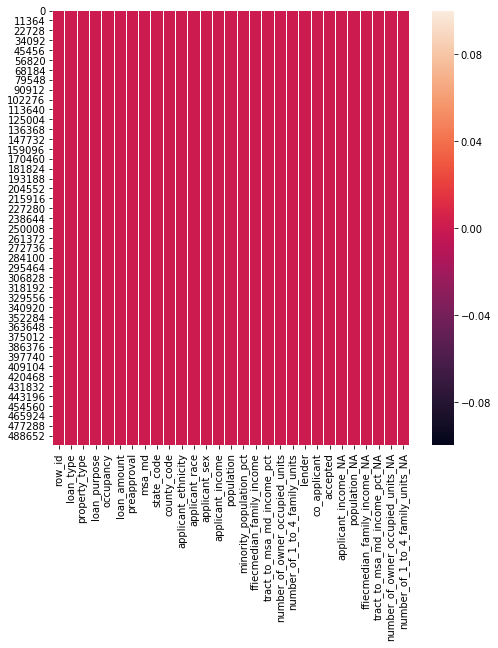

In [113]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

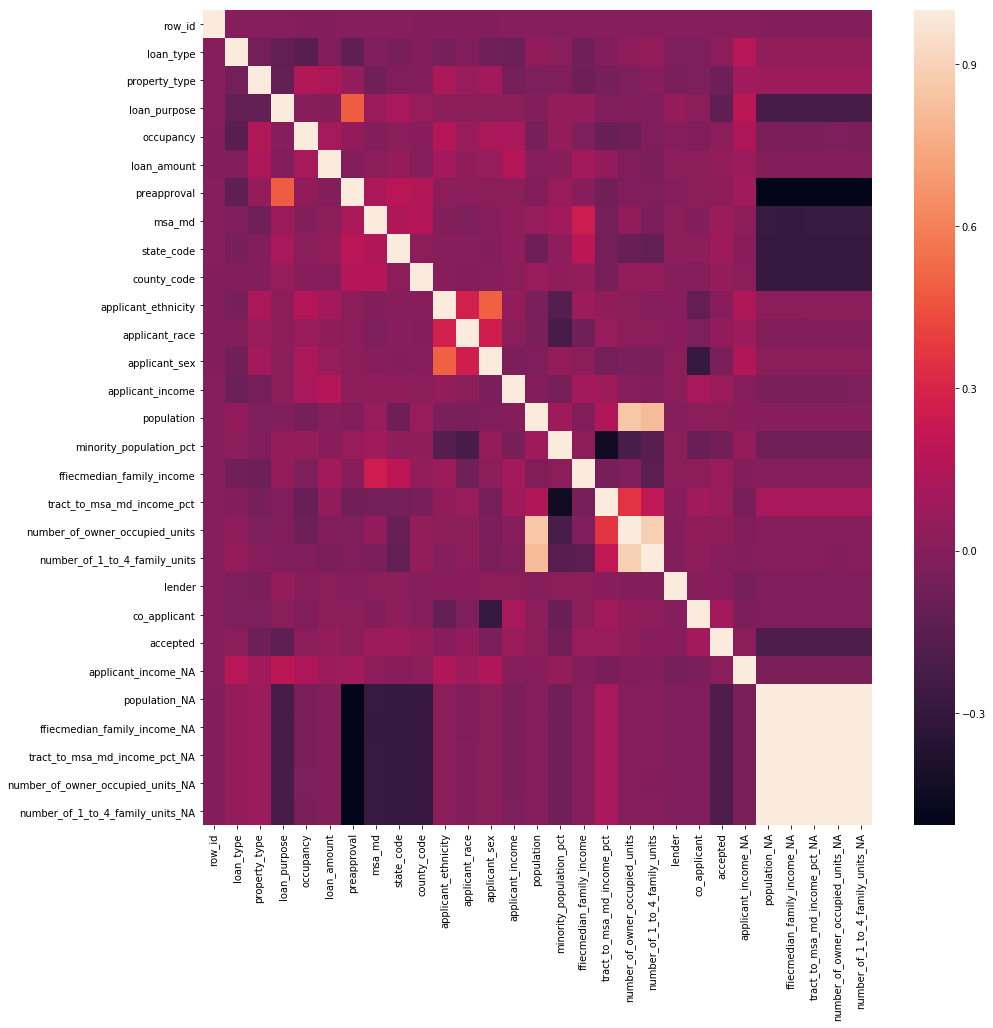

In [114]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr())

## lender

In [9]:
pd.groupby(train.lender, by=)

TypeError: You have to supply one of 'by' and 'level'

In [211]:
train_copy = train.copy()
test_copy = test.copy()

## 2.0 OUTLIERS

In [212]:
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

## 2.0 loan amount 

Text(0.5, 0, 'loan_amount')

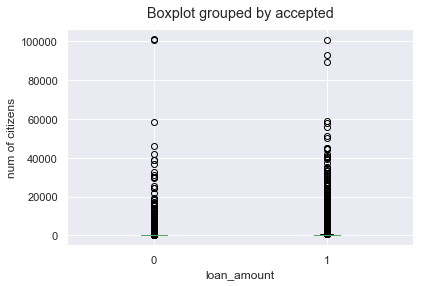

In [213]:
fig = train_copy.boxplot(column='loan_amount',by='accepted')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('loan_amount')

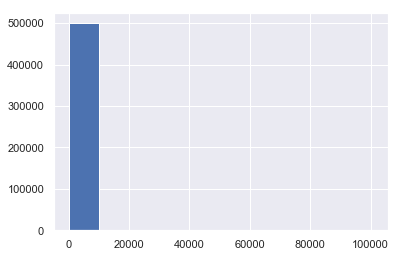

In [214]:
train_copy.loan_amount.hist()

In [215]:
# upper and lower boundaries for the outliers according to interquantile proximity rule

IQR = train_copy.loan_amount.quantile(0.75) - train_copy.loan_amount.quantile(0.25)

lower_fence = train_copy.loan_amount.quantile(0.25) - (IQR * 1.0)
Upper_fence = train_copy.loan_amount.quantile(0.75) + (IQR * 1.5)
lower_fence,Upper_fence

(-80.0, 525.5)

In [216]:
train_copy.loc[train_copy.loan_amount>Upper_fence,'loan_amount']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.loan_amount>Upper_fence,'loan_amount']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
train_copy.loc[train_copy.loan_amount<lower_fence,'loan_amount']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.loan_amount<lower_fence,'loan_amount']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)


Text(0.5, 0, 'loan_amount')

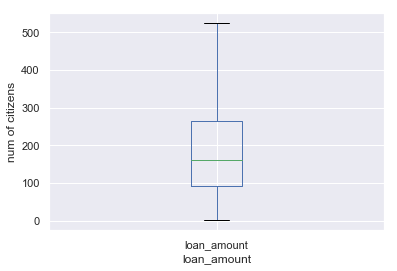

In [217]:
fig = train_copy.boxplot(column='loan_amount')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('loan_amount')

In [218]:
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

## 2.1 msa_sd

Text(0.5, 0, 'msa_md')

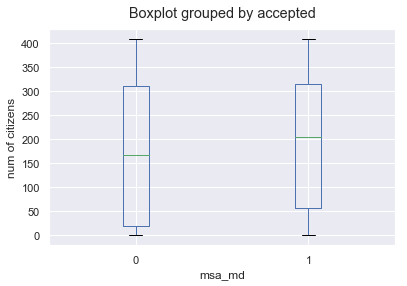

In [219]:
fig = train_copy.boxplot(column='msa_md',by='accepted')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('msa_md')

## 2.2 applicant_income

Text(0.5, 0, 'applicant_income')

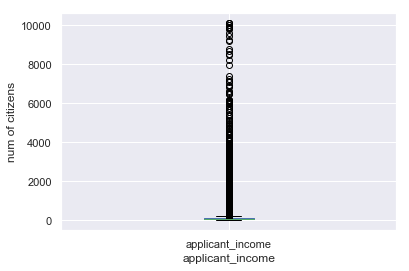

In [220]:
fig = train_copy.boxplot(column='applicant_income')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('applicant_income')

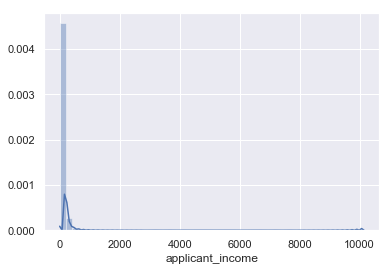

In [221]:
sns.distplot(train_copy.applicant_income)

In [222]:
train_copy.applicant_income.describe()

count    500000.000000
mean        102.389521
std         147.273425
min           1.000000
25%          49.000000
50%          79.000000
75%         112.000000
max       10139.000000
Name: applicant_income, dtype: float64

In [223]:
upper_b = train_copy.applicant_income.mean() + 3*train_copy.applicant_income.std()
upper_b

544.2097973995878

In [224]:
train_copy.loc[train_copy.applicant_income>upper_b,'applicant_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.applicant_income>upper_b,'applicant_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

In [226]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [227]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6987592420538722
Logistic Reg accuracy: 0.6458865671641791
Test set mean imputation
Logistic Reg roc_auc: 0.6963192410552609
Logistic Reg accuracy: 0.6440424242424242



In [228]:
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                   44.230                    60588.0   
1                   15.905                    54821.0   
2                   61.270                    67719.0   
3                    6.246                    78439.0   
4                  100.000                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

## 2.3 population

Text(0.5, 0, 'population')

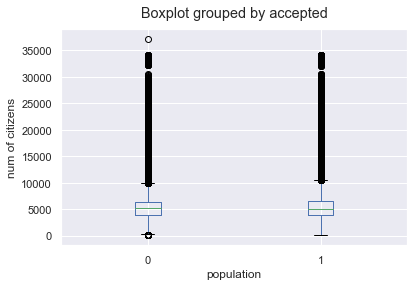

In [229]:
fig = train_copy.boxplot(column='population',by='accepted')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('population')

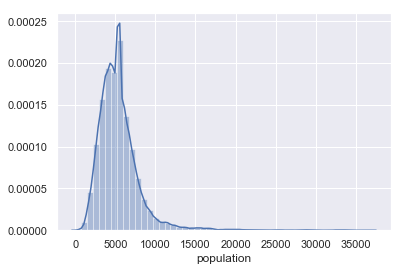

In [230]:
sns.distplot(train_copy.population)

# 2.4 minority_population_pct

Text(0.5, 0, 'minority_population_pct')

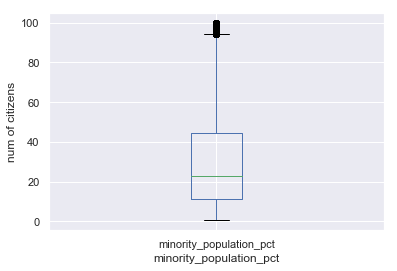

In [231]:
fig = train_copy.boxplot(column='minority_population_pct')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('minority_population_pct')

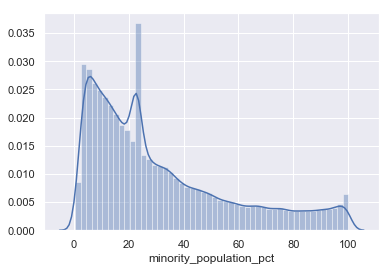

In [232]:
sns.distplot(train_copy.minority_population_pct)

In [233]:
# upper and lower boundaries for the outliers according to interquantile proximity rule

IQR = train_copy.minority_population_pct.quantile(0.75) - train_copy.minority_population_pct.quantile(0.25)

lower_fence = train_copy.minority_population_pct.quantile(0.25) - (IQR * 1.5)
Upper_fence = train_copy.minority_population_pct.quantile(0.75) + (IQR * 1.5)
lower_fence,Upper_fence

(-38.75150000000001, 94.42850000000001)

In [234]:
train_copy.loc[train_copy.minority_population_pct>Upper_fence,'minority_population_pct']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.minority_population_pct>Upper_fence,'minority_population_pct']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
train_copy.loc[train_copy.minority_population_pct<lower_fence,'minority_population_pct']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.minority_population_pct<lower_fence,'minority_population_pct']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)


In [140]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [141]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6987344940506515
Logistic Reg accuracy: 0.6458447761194029
Test set mean imputation
Logistic Reg roc_auc: 0.6962991447905384
Logistic Reg accuracy: 0.6441757575757576



In [235]:
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                  44.2300                    60588.0   
1                  15.9050                    54821.0   
2                  61.2700                    67719.0   
3                   6.2460                    78439.0   
4                  94.4285                    63075.0   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

## 2.5 ffiecmedian_family_income

Text(0.5, 0, 'ffiecmedian_family_income')

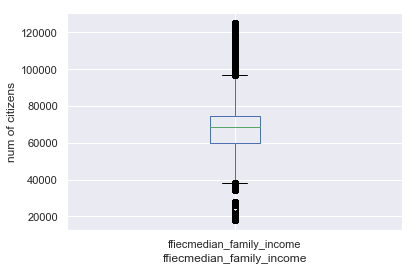

In [236]:
fig = train_copy.boxplot(column='ffiecmedian_family_income')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('ffiecmedian_family_income')

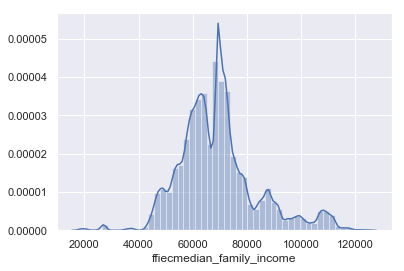

In [237]:
sns.distplot(train_copy.ffiecmedian_family_income)

In [238]:
upper_b = train_copy.ffiecmedian_family_income.mean() + 3*train_copy.applicant_income.std()
lower_b = train_copy.ffiecmedian_family_income.mean() - 3*train_copy.applicant_income.std()

upper_b,lower_b

(69477.20669854624, 68993.9998974954)

In [239]:
train_copy.loc[train_copy.ffiecmedian_family_income>upper_b,'ffiecmedian_family_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.ffiecmedian_family_income>upper_b,'ffiecmedian_family_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
train_copy.loc[train_copy.ffiecmedian_family_income<lower_b,'ffiecmedian_family_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.ffiecmedian_family_income<lower_b,'ffiecmedian_family_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [148]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6984463666434737
Logistic Reg accuracy: 0.6454298507462687
Test set mean imputation
Logistic Reg roc_auc: 0.6960551022212018
Logistic Reg accuracy: 0.6443878787878788



In [240]:
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                  44.2300               69477.206699   
1                  15.9050               69477.206699   
2                  61.2700               69477.206699   
3                   6.2460               69477.206699   
4                  94.4285               69477.206699   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

## 2.6 tract_to_msa_md_income_pct

Text(0.5, 0, 'tract_to_msa_md_income_pct')

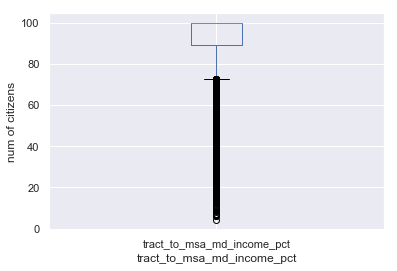

In [241]:
fig = train_copy.boxplot(column='tract_to_msa_md_income_pct')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('tract_to_msa_md_income_pct')

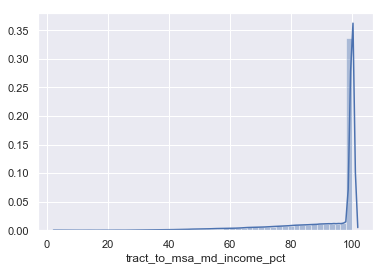

In [242]:
sns.distplot(train_copy.tract_to_msa_md_income_pct)

## 2.7 	number_of_owner_occupied_units

In [243]:
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                  44.2300               69477.206699   
1                  15.9050               69477.206699   
2                  61.2700               69477.206699   
3                   6.2460               69477.206699   
4                  94.4285               69477.206699   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

Text(0.5, 0, 'number_of_owner_occupied_units')

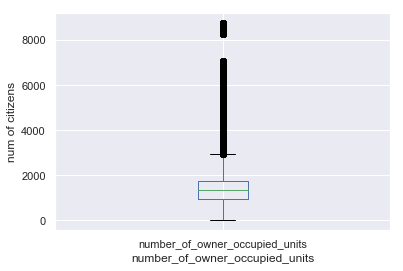

In [244]:
fig = train_copy.boxplot(column='number_of_owner_occupied_units')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('number_of_owner_occupied_units')

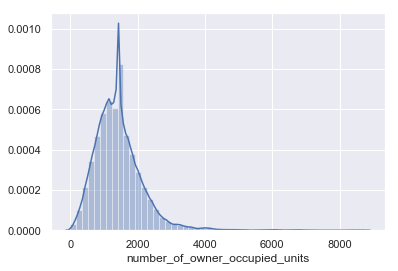

In [245]:
sns.distplot(train_copy.number_of_owner_occupied_units)

In [246]:
upper_b = train_copy.number_of_owner_occupied_units.mean() + 3*train_copy.number_of_owner_occupied_units.std()
lower_b = train_copy.number_of_owner_occupied_units.mean() - 3*train_copy.number_of_owner_occupied_units.std()

upper_b,lower_b

(3589.891216229807, -734.4546520902436)

In [247]:
train_copy.loc[train_copy.number_of_owner_occupied_units>upper_b,'number_of_owner_occupied_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.number_of_owner_occupied_units>upper_b,'number_of_owner_occupied_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
train_copy.loc[train_copy.number_of_owner_occupied_units<lower_b,'number_of_owner_occupied_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.number_of_owner_occupied_units<lower_b,'number_of_owner_occupied_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [158]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6984452751201446
Logistic Reg accuracy: 0.6454238805970149
Test set mean imputation
Logistic Reg roc_auc: 0.6960585329467663
Logistic Reg accuracy: 0.644430303030303



In [248]:
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                  44.2300               69477.206699   
1                  15.9050               69477.206699   
2                  61.2700               69477.206699   
3                   6.2460               69477.206699   
4                  94.4285               69477.206699   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

## 2.8 number_of_1_to_4_family_units

Text(0.5, 0, 'number_of_1_to_4_family_units')

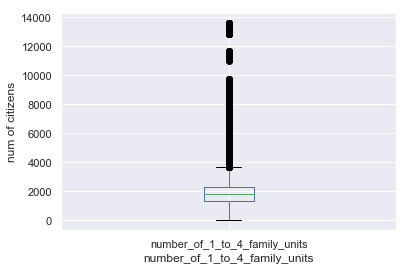

In [249]:
fig = train_copy.boxplot(column='number_of_1_to_4_family_units')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('number_of_1_to_4_family_units')

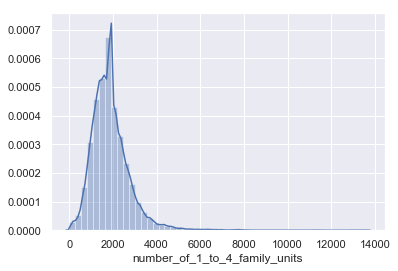

In [250]:
sns.distplot(train_copy.number_of_1_to_4_family_units)

In [251]:
upper_b = train_copy.number_of_1_to_4_family_units.mean() + 2.3*train_copy.number_of_1_to_4_family_units.std()
lower_b = train_copy.number_of_1_to_4_family_units.mean() - 3*train_copy.number_of_1_to_4_family_units.std()

upper_b,lower_b

(3940.716618124381, -793.7262657700778)

In [252]:
train_copy.loc[train_copy.number_of_1_to_4_family_units>upper_b,'number_of_1_to_4_family_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.number_of_1_to_4_family_units>upper_b,'number_of_1_to_4_family_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
train_copy.loc[train_copy.number_of_1_to_4_family_units<lower_b,'number_of_1_to_4_family_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.number_of_1_to_4_family_units<lower_b,'number_of_1_to_4_family_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [165]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6982315254185538
Logistic Reg accuracy: 0.645223880597015
Test set mean imputation
Logistic Reg roc_auc: 0.6958684631103306
Logistic Reg accuracy: 0.6444363636363636



In [166]:
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                  44.2300               69477.206699   
1                  15.9050               69477.206699   
2                  61.2700               69477.206699   
3                   6.2460               69477.206699   
4                  94.4285               69477.206699   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536         False         1   
1                         2108.0    2458         False         0   
2                         1048.0    5710         False         1   
3                         2299.0    5888          True         1   
4                         1847.0     289         False         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

## 2.9 lender

Text(0.5, 0, 'lender')

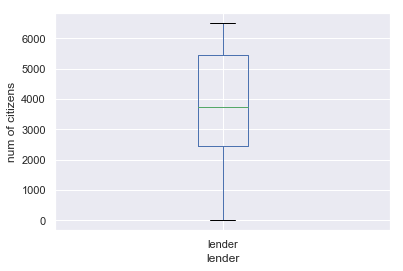

In [253]:
fig = train_copy.boxplot(column='lender')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('lender')

## 3.0 Categorical features

## 3.0 co_applicant

In [254]:
train_copy['co_applicant'] = np.where(train.co_applicant==True,1,0)
test_copy['co_applicant'] = np.where(test.co_applicant==True,1,0)
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_race  applicant_sex  applicant_income  population  \
0               5              1              24.0      6203.0   
1               5              1              57.0      5774.0   
2               5              1              67.0      6094.0   
3               5              1             105.0      6667.0   
4               3              2              71.0      6732.0   

   minority_population_pct  ffiecmedian_family_income  \
0                  44.2300               69477.206699   
1                  15.9050               69477.206699   
2                  61.2700               69477.206699   
3                   6.2460               69477.206699   
4                  94.4285               69477.206699   

   tract_to_msa_md_income_pct  number_of_owner_occupied_units  \
0                      50.933                           716.0   
1                     100.000                          1622.0   
2                     100.000                           760.0   
3                     100.000                          2025.0   
4                      82.200                          1464.0   

   number_of_1_to_4_family_units  lender  co_applicant  accepted  \
0                         2642.0    4536             0         1   
1                         2108.0    2458             0         0   
2                         1048.0    5710             0         1   
3                         2299.0    5888             1         1   
4                         1847.0     289             0         1   

   applicant_income_NA  population_NA  ffiecmedian_family_income_NA  \
0                    0              0                             0   
1                    0              0                             0   
2                    0              0                             0   
3                    0              0                             0   
4                    0              0                             0   

   tract_to_msa_md_income_pct_NA  number_of_owner_occupied_units_NA  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   number_of_1_to_4_family_units_NA  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

In [255]:
categorical_col = ['loan_type','property_type','loan_purpose','occupancy','preapproval','applicant_ethnicity','applicant_race','applicant_sex']

In [256]:
df_cat_train = pd.DataFrame(data=train,columns=categorical_col)
df_cat_test = pd.DataFrame(data=test,columns=categorical_col)
df_cat_train.head()

loan_type  property_type  loan_purpose  occupancy  preapproval  \
0          3              1             1          1            3   
1          1              1             3          1            3   
2          2              1             3          1            3   
3          1              1             1          1            1   
4          1              1             1          1            3   

   applicant_ethnicity  applicant_race  applicant_sex  
0                    2               5              1  
1                    1               5              1  
2                    2               5              1  
3                    2               5              1  
4                    2               3              2

## 3.1 loan_type

In [257]:
def freq_dist(df_categories):
    category_count = df_categories['loan_type'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of loan_type')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('loan_type',fontsize = 12)
    plt.show()

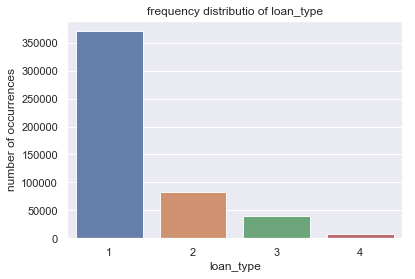

In [258]:
freq_dist(df_cat_train)

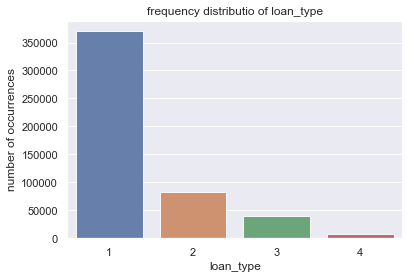

In [259]:
freq_dist(df_cat_test)

In [260]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['loan_type'],prefix='loan_type_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['loan_type'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['loan_type'],prefix='loan_type_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['loan_type'],inplace= True,axis=1)
df_cat_train.head()

property_type  loan_purpose  occupancy  preapproval  applicant_ethnicity  \
0              1             1          1            3                    2   
1              1             3          1            3                    1   
2              1             3          1            3                    2   
3              1             1          1            1                    2   
4              1             1          1            3                    2   

   applicant_race  applicant_sex  loan_type__1  loan_type__2  loan_type__3  \
0               5              1             0             0             1   
1               5              1             1             0             0   
2               5              1             0             1             0   
3               5              1             1             0             0   
4               3              2             1             0             0   

   loan_type__4  
0             0  
1             0  
2             0  
3             0  
4             0

In [261]:
def freq_dist(df_categories):
    category_count = df_categories['property_type'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of property_type')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('property_type',fontsize = 12)
    plt.show()

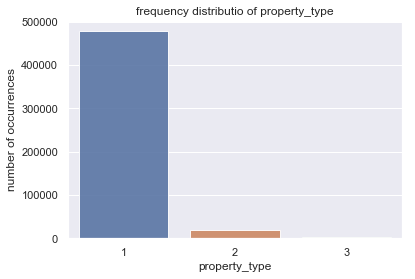

In [262]:
freq_dist(df_cat_train)

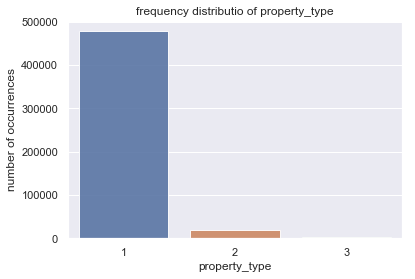

In [263]:
freq_dist(df_cat_train)

In [264]:
binary_col = ['property_type']

In [265]:
df_cat_train.head()

property_type  loan_purpose  occupancy  preapproval  applicant_ethnicity  \
0              1             1          1            3                    2   
1              1             3          1            3                    1   
2              1             3          1            3                    2   
3              1             1          1            1                    2   
4              1             1          1            3                    2   

   applicant_race  applicant_sex  loan_type__1  loan_type__2  loan_type__3  \
0               5              1             0             0             1   
1               5              1             1             0             0   
2               5              1             0             1             0   
3               5              1             1             0             0   
4               3              2             1             0             0   

   loan_type__4  
0             0  
1             0  
2             0  
3             0  
4             0

In [266]:
def freq_dist(df_categories):
    category_count = df_categories['loan_purpose'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of loan_purpose')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('loan_purpose',fontsize = 12)
    plt.show()

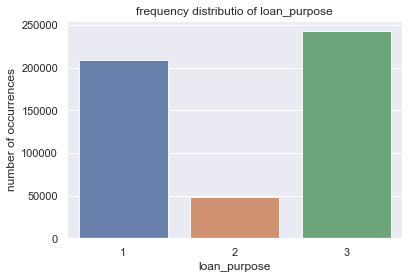

In [267]:
freq_dist(df_cat_train)

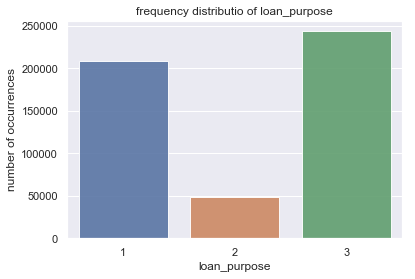

In [268]:
freq_dist(df_cat_test)

In [269]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['loan_purpose'],prefix='loan_purpose_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['loan_purpose'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['loan_purpose'],prefix='loan_purpose_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['loan_purpose'],inplace= True,axis=1)
df_cat_train.head()

property_type  occupancy  preapproval  applicant_ethnicity  applicant_race  \
0              1          1            3                    2               5   
1              1          1            3                    1               5   
2              1          1            3                    2               5   
3              1          1            1                    2               5   
4              1          1            3                    2               3   

   applicant_sex  loan_type__1  loan_type__2  loan_type__3  loan_type__4  \
0              1             0             0             1             0   
1              1             1             0             0             0   
2              1             0             1             0             0   
3              1             1             0             0             0   
4              2             1             0             0             0   

   loan_purpose__1  loan_purpose__2  loan_purpose__3  
0                1                0                0  
1                0                0                1  
2                0                0                1  
3                1                0                0  
4                1                0                0

In [270]:
def freq_dist(df_categories):
    category_count = df_categories['occupancy'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of occupancy')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('occupancy',fontsize = 12)
    plt.show()

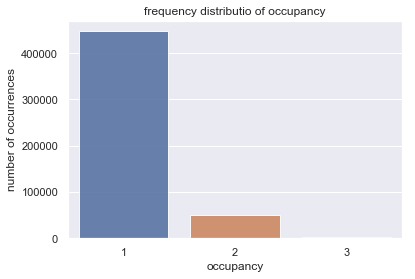

In [271]:
freq_dist(df_cat_train)

In [272]:
binary_col.append('occupancy')
binary_col

['property_type', 'occupancy']

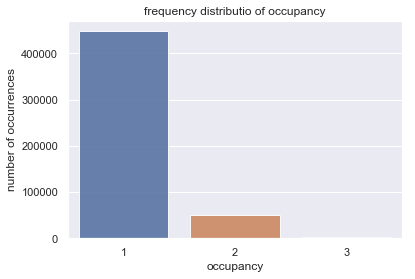

In [273]:
freq_dist(df_cat_test)

In [274]:
df_cat_train.head()

property_type  occupancy  preapproval  applicant_ethnicity  applicant_race  \
0              1          1            3                    2               5   
1              1          1            3                    1               5   
2              1          1            3                    2               5   
3              1          1            1                    2               5   
4              1          1            3                    2               3   

   applicant_sex  loan_type__1  loan_type__2  loan_type__3  loan_type__4  \
0              1             0             0             1             0   
1              1             1             0             0             0   
2              1             0             1             0             0   
3              1             1             0             0             0   
4              2             1             0             0             0   

   loan_purpose__1  loan_purpose__2  loan_purpose__3  
0                1                0                0  
1                0                0                1  
2                0                0                1  
3                1                0                0  
4                1                0                0

In [275]:
def freq_dist(df_categories):
    category_count = df_categories['preapproval'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of preapproval')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('preapproval',fontsize = 12)
    plt.show()

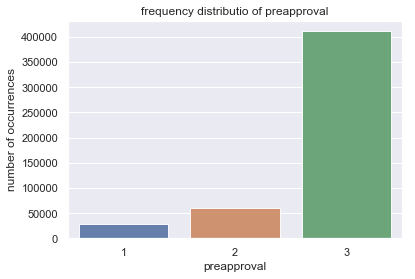

In [276]:
freq_dist(df_cat_train)

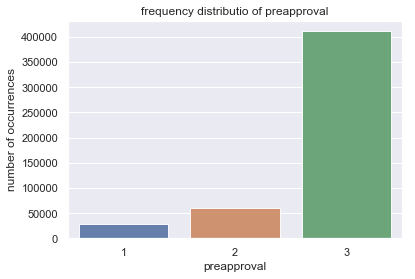

In [277]:
freq_dist(df_cat_test)

In [278]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['preapproval'],prefix='preapproval_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['preapproval'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['preapproval'],prefix='preapproval_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['preapproval'],inplace= True,axis=1)
df_cat_train.head()

property_type  occupancy  applicant_ethnicity  applicant_race  \
0              1          1                    2               5   
1              1          1                    1               5   
2              1          1                    2               5   
3              1          1                    2               5   
4              1          1                    2               3   

   applicant_sex  loan_type__1  loan_type__2  loan_type__3  loan_type__4  \
0              1             0             0             1             0   
1              1             1             0             0             0   
2              1             0             1             0             0   
3              1             1             0             0             0   
4              2             1             0             0             0   

   loan_purpose__1  loan_purpose__2  loan_purpose__3  preapproval__1  \
0                1                0                0               0   
1                0                0                1               0   
2                0                0                1               0   
3                1                0                0               1   
4                1                0                0               0   

   preapproval__2  preapproval__3  
0               0               1  
1               0               1  
2               0               1  
3               0               0  
4               0               1

In [279]:
def freq_dist(df_categories):
    category_count = df_categories['applicant_ethnicity'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of applicant_ethnicity')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('applicant_ethnicity',fontsize = 12)
    plt.show()

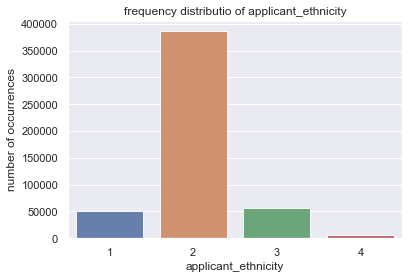

In [280]:
freq_dist(df_cat_train)

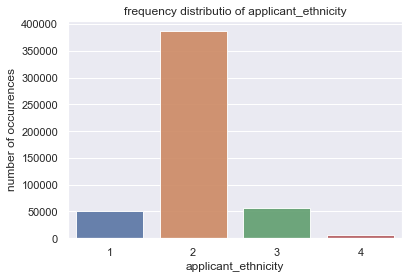

In [281]:
freq_dist(df_cat_test)

In [282]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['applicant_ethnicity'],prefix='applicant_ethnicity_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['applicant_ethnicity'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['applicant_ethnicity'],prefix='applicant_ethnicity_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['applicant_ethnicity'],inplace= True,axis=1)
df_cat_train.head()

property_type  occupancy  applicant_race  applicant_sex  loan_type__1  \
0              1          1               5              1             0   
1              1          1               5              1             1   
2              1          1               5              1             0   
3              1          1               5              1             1   
4              1          1               3              2             1   

   loan_type__2  loan_type__3  loan_type__4  loan_purpose__1  loan_purpose__2  \
0             0             1             0                1                0   
1             0             0             0                0                0   
2             1             0             0                0                0   
3             0             0             0                1                0   
4             0             0             0                1                0   

   loan_purpose__3  preapproval__1  preapproval__2  preapproval__3  \
0                0               0               0               1   
1                1               0               0               1   
2                1               0               0               1   
3                0               1               0               0   
4                0               0               0               1   

   applicant_ethnicity__1  applicant_ethnicity__2  applicant_ethnicity__3  \
0                       0                       1                       0   
1                       1                       0                       0   
2                       0                       1                       0   
3                       0                       1                       0   
4                       0                       1                       0   

   applicant_ethnicity__4  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [283]:
def freq_dist(df_categories):
    category_count = df_categories['applicant_race'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of applicant_race')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('applicant_race',fontsize = 12)
    plt.show()

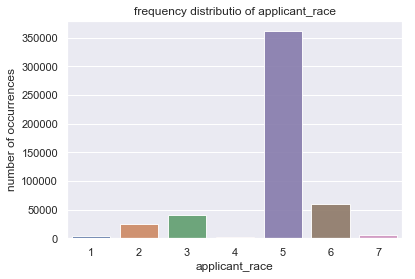

In [284]:
freq_dist(df_cat_train)

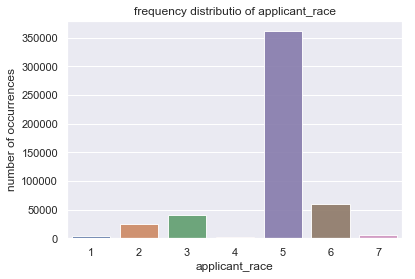

In [285]:
freq_dist(df_cat_test)

In [286]:
#since both have approximate distribution and a spike of one label while the rest are level, i will give priority to the highly occurred label
df_cat_test['applicant_race'] = np.where(df_cat_test['applicant_race']==5, 1, 0)
df_cat_train['applicant_race'] = np.where(df_cat_train['applicant_race']==5, 1, 0)
df_cat_train.head()

property_type  occupancy  applicant_race  applicant_sex  loan_type__1  \
0              1          1               1              1             0   
1              1          1               1              1             1   
2              1          1               1              1             0   
3              1          1               1              1             1   
4              1          1               0              2             1   

   loan_type__2  loan_type__3  loan_type__4  loan_purpose__1  loan_purpose__2  \
0             0             1             0                1                0   
1             0             0             0                0                0   
2             1             0             0                0                0   
3             0             0             0                1                0   
4             0             0             0                1                0   

   loan_purpose__3  preapproval__1  preapproval__2  preapproval__3  \
0                0               0               0               1   
1                1               0               0               1   
2                1               0               0               1   
3                0               1               0               0   
4                0               0               0               1   

   applicant_ethnicity__1  applicant_ethnicity__2  applicant_ethnicity__3  \
0                       0                       1                       0   
1                       1                       0                       0   
2                       0                       1                       0   
3                       0                       1                       0   
4                       0                       1                       0   

   applicant_ethnicity__4  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [287]:
binary_col.append('applicant_sex')
binary_col

['property_type', 'occupancy', 'applicant_sex']

In [288]:
df_cat_train.drop(columns=binary_col,axis= 1,inplace= True)
df_cat_test.drop(columns=binary_col,axis= 1,inplace= True)
df_cat_train.head()

applicant_race  loan_type__1  loan_type__2  loan_type__3  loan_type__4  \
0               1             0             0             1             0   
1               1             1             0             0             0   
2               1             0             1             0             0   
3               1             1             0             0             0   
4               0             1             0             0             0   

   loan_purpose__1  loan_purpose__2  loan_purpose__3  preapproval__1  \
0                1                0                0               0   
1                0                0                1               0   
2                0                0                1               0   
3                1                0                0               1   
4                1                0                0               0   

   preapproval__2  preapproval__3  applicant_ethnicity__1  \
0               0               1                       0   
1               0               1                       1   
2               0               1                       0   
3               0               0                       0   
4               0               1                       0   

   applicant_ethnicity__2  applicant_ethnicity__3  applicant_ethnicity__4  
0                       1                       0                       0  
1                       0                       0                       0  
2                       1                       0                       0  
3                       1                       0                       0  
4                       1                       0                       0

In [289]:
train_copy.drop(columns=['applicant_race'],axis= 1,inplace= True)
test_copy.drop(columns=['applicant_race'],axis= 1,inplace= True)
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_sex  applicant_income  population  minority_population_pct  \
0              1              24.0      6203.0                  44.2300   
1              1              57.0      5774.0                  15.9050   
2              1              67.0      6094.0                  61.2700   
3              1             105.0      6667.0                   6.2460   
4              2              71.0      6732.0                  94.4285   

   ffiecmedian_family_income  tract_to_msa_md_income_pct  \
0               69477.206699                      50.933   
1               69477.206699                     100.000   
2               69477.206699                     100.000   
3               69477.206699                     100.000   
4               69477.206699                      82.200   

   number_of_owner_occupied_units  number_of_1_to_4_family_units  lender  \
0                           716.0                         2642.0    4536   
1                          1622.0                         2108.0    2458   
2                           760.0                         1048.0    5710   
3                          2025.0                         2299.0    5888   
4                          1464.0                         1847.0     289   

   co_applicant  accepted  applicant_income_NA  population_NA  \
0             0         1                    0              0   
1             0         0                    0              0   
2             0         1                    0              0   
3             1         1                    0              0   
4             0         1                    0              0   

   ffiecmedian_family_income_NA  tract_to_msa_md_income_pct_NA  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   number_of_owner_occupied_units_NA  number_of_1_to_4_family_units_NA  
0                                  0                                 0  
1                                  0                                 0  
2                                  0                                 0  
3                                  0                                 0  
4                                  0                                 0

In [290]:
train_copy = pd.concat([train_copy,df_cat_train],axis=1)
test_copy = pd.concat([test_copy,df_cat_test],axis=1)
train_copy.head()

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0       0          3              1             1          1         70.0   
1       1          1              1             3          1        178.0   
2       2          2              1             3          1        163.0   
3       3          1              1             1          1        155.0   
4       4          1              1             1          1        305.0   

   preapproval  msa_md  state_code  county_code  applicant_ethnicity  \
0            3      18          37          246                    2   
1            3     369          52          299                    1   
2            3      16          10          306                    2   
3            1     305          47          180                    2   
4            3      24          37           20                    2   

   applicant_sex  applicant_income  population  minority_population_pct  \
0              1              24.0      6203.0                  44.2300   
1              1              57.0      5774.0                  15.9050   
2              1              67.0      6094.0                  61.2700   
3              1             105.0      6667.0                   6.2460   
4              2              71.0      6732.0                  94.4285   

   ffiecmedian_family_income  tract_to_msa_md_income_pct  \
0               69477.206699                      50.933   
1               69477.206699                     100.000   
2               69477.206699                     100.000   
3               69477.206699                     100.000   
4               69477.206699                      82.200   

   number_of_owner_occupied_units  number_of_1_to_4_family_units  lender  \
0                           716.0                         2642.0    4536   
1                          1622.0                         2108.0    2458   
2                           760.0                         1048.0    5710   
3                          2025.0                         2299.0    5888   
4                          1464.0                         1847.0     289   

   co_applicant  accepted  applicant_income_NA  population_NA  \
0             0         1                    0              0   
1             0         0                    0              0   
2             0         1                    0              0   
3             1         1                    0              0   
4             0         1                    0              0   

   ffiecmedian_family_income_NA  tract_to_msa_md_income_pct_NA  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   number_of_owner_occupied_units_NA  number_of_1_to_4_family_units_NA  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   

   applicant_race  loan_type__1  loan_type__2  loan_type__3  loan_type__4  \
0               1             0             0             1             0   
1               1             1             0             0             0   
2               1             0             1             0             0   
3               1             1             0             0             0   
4               0             1             0             0             0   

   loan_purpose__1  loan_purpose__2  loan_purpose__3  preapproval__1  \
0                1                0                0               0  

In [292]:
len(train_copy),len(test_copy)

(500000, 500000)

In [302]:
np.shape(train_copy),np.shape(test_copy)

((500000, 43), (500000, 42))

In [303]:
train_copy1 = train_copy.copy()
test_copy1 = test_copy.copy()
train_copy=train_copy1.copy()
test_copy=test_copy1.copy()

In [327]:
X = train_copy.drop(columns=['row_id','accepted'],axis = 1)
test = test_copy.drop(columns=['row_id'])
y = train_copy.accepted

In [328]:
np.shape(X),np.shape(y),np.shape(test)

((500000, 41), (500000,), (500000, 41))

In [309]:
#st_scaler = StandardScaler()

In [310]:
#for col in X.columns:
  #  X[col] = pd.DataFrame(st_scaler.fit_transform(X[col].values.reshape(-1, 1)))
  #  test_copy[col] = pd.DataFrame(st_scaler.transform(test_copy[col].values.reshape(-1, 1)))

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Models

In [331]:
seed = 42

## 6.0  AdaBoostClassifier

In [333]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 200,learning_rate=0.1,random_state=42,algorithm='SAMME.R')
ada.fit(X_train,y_train)
print('Train set mean imputation')
pred = ada.predict_proba(X_train)
print('ada Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = ada.predict(X_train)
print('ada Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = ada.predict_proba(X_test)
print('adaReg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = ada.predict(X_test)
print('ada Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
ada Reg roc-auc: 0.7313609345174443
ada Reg accuracy: 0.6717492537313433
Test set mean imputation
adaReg roc_auc: 0.7303871941893675
ada Reg accuracy: 0.6705636363636364



In [332]:
0.6705636363636364

0.6705636363636364

In [317]:
ada.fit(X,y)
predictions =  ada.predict(test)
predictions = pd.DataFrame(data=predictions)


In [321]:
sample_sub.accepted = predictions
sample_sub.to_csv('pred2_ada.csv',index = False)

## XGB

In [334]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score  #Additional scklearn functions
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
xgb0 = XGBClassifier(n_estimators=100,n_jobs=4,objective= 'binary:logistic')

In [ ]:
xgb0 = XGBClassifier(n_estimators=100,n_jobs=4,objective= 'binary:logistic')
xgb0.fit(X_train, y_train)
y_pred = xgb0.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('accuracy: {}'.format(accuracy * 100))
# Fit model using each importance as a threshold
thresholds = sort(xgb0.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb0, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier(learning_rate =0.1,n_estimators=200,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=seed,silent=False)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.6f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [320]:
xgb0 = XGBClassifier(n_estimators=200,n_jobs=4,objective= 'binary:logistic')
xgb0.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [322]:
predictions =  xgb0.predict(test)
predictions = pd.DataFrame(data=predictions)

In [323]:
sample_sub.accepted = predictions
sample_sub.to_csv('pred2_xgb.csv',index = False)

In [324]:
sample_sub.head()

row_id  accepted
0       0         1
1       1         1
2       2         1
3       3         1
4       4         0

## lgbm

In [335]:
import lightgbm as lgbm
d_train = lgbm.Dataset(X_train,label=y_train,params = {'metric': 'logloss'})
params = {}
params['learning_rate'] = 0.003
params['objective'] = 'binary'
params['metric'] ='binary_logloss'
params['boosting_type'] ='gbdt'

params['sub_feature'] = 0.5
params['num_class'] = 1
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
params['early_stopping_round'] = 50
params['device'] = 'cpu'




In [336]:
lgb_eval = lgbm.Dataset(X_test,y_test,reference=d_train)
model = lgbm.train(params,d_train,num_boost_round= 100000,valid_sets=lgb_eval,early_stopping_rounds=50)

[1]	valid_0's binary_logloss: 0.692782
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.692396
[3]	valid_0's binary_logloss: 0.692019
[4]	valid_0's binary_logloss: 0.691768
[5]	valid_0's binary_logloss: 0.691392
[6]	valid_0's binary_logloss: 0.691058
[7]	valid_0's binary_logloss: 0.690687
[8]	valid_0's binary_logloss: 0.690333
[9]	valid_0's binary_logloss: 0.690047
[10]	valid_0's binary_logloss: 0.68966
[11]	valid_0's binary_logloss: 0.689304
[12]	valid_0's binary_logloss: 0.688994
[13]	valid_0's binary_logloss: 0.688622
[14]	valid_0's binary_logloss: 0.68833
[15]	valid_0's binary_logloss: 0.688048
[16]	valid_0's binary_logloss: 0.687682
[17]	valid_0's binary_logloss: 0.68736
[18]	valid_0's binary_logloss: 0.687015
[19]	valid_0's binary_logloss: 0.68667
[20]	valid_0's binary_logloss: 0.686355
[21]	valid_0's binary_logloss: 0.686029
[22]	valid_0's binary_logloss: 0.685701
[23]	valid_0's binary_logloss: 0.685393
[24]	valid_0's binary_logloss: 

KeyboardInterrupt: 

In [ ]:
d_train = lgbm.Dataset(X,label=y)
params = {}
params['learning_rate'] = 0.003
params['objective'] = 'binary'
params['metric'] ='binary_logloss'
params['boosting_type'] ='gbdt'

params['sub_feature'] = 0.5
params['num_class'] = 1
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
#params['early_stopping_round'] = 50
params['device'] = 'cpu'

In [ ]:
model = lgbm.train(params,d_train,num_boost_round= 12380)

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
lgbm.plot_importance(model,importance_type = 'split',max_num_features = len(X.columns),ax=ax)
#lgbm.plot_importance(model,importance_type = 'gain',max_num_features = len(X.columns),ax=ax)

In [ ]:
predictions =  model.predict(test)
predictions = pd.DataFrame(data=predictions)

In [ ]:
predictions = pd.DataFrame(data=predictions)
sample_sub['accepted_round'] = np.round(predictions)
sample_sub['accepted_round'].astype(np.int64)
sample_sub.head()

In [ ]:
sample_sub.accepted=sample_sub.accepted_round
sample_sub.drop(columns=['accepted_round'],axis=1,inplace=True)
sample_sub.to_csv('pred1_lgbm.csv',index = False)

In [ ]:
sample_sub.accepted = sample_sub.accepted.astype(np.int64)

In [ ]:
sample_sub.to_csv('pred1_lgbm.csv',index = False)